<center><img src="https://media.licdn.com/dms/image/D4D0BAQHOLNi1297n2g/company-logo_200_200/0/1697658047551?e=1707955200&v=beta&t=PaSbWR-y89ji3AKX9SAQs4dHjmhhgENXgMzasUTpgrE"></center>

This Project is the traditionnal machine learning project, the main objective is to practice `Python`, `Data Cleaning`, `Data Visualization` `Machine Learning`.

The main objectif is to train a machine learning model for house selling prediction based on a structured data.

# Set Up the envirement

* Importing the necessary data 

In [73]:
import numpy as np
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, dataloader
import matplotlib.pyplot as plt

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1,55900
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1,29250
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0,51350
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0,62725


* Importing the data 

In [74]:
df = pd.read_csv("./HousePrices_HalfMil.csv")
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


Our data is now ready to be use, we need to know some other informations such as the size of our data and also the differents parameters .

In [75]:
df.shape

(500000, 16)

Our data is big to be used for studies, can see that we have $15$ Feature and $1$ target

# Data Visualization 

<Axes: ylabel='Frequency'>

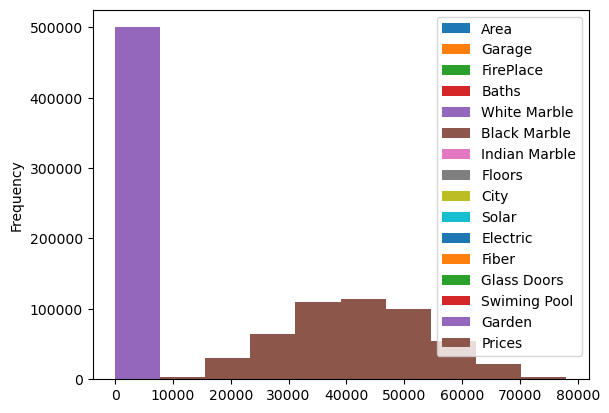

In [76]:
df.plot.hist()

<Axes: >

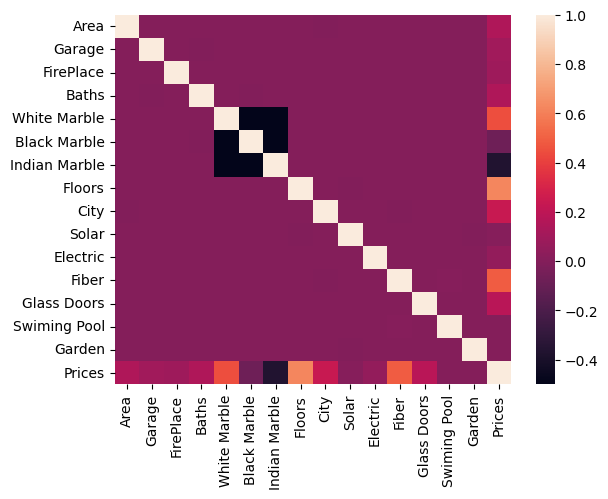

In [77]:
sns.heatmap(df.corr())

c:\Users\khaba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


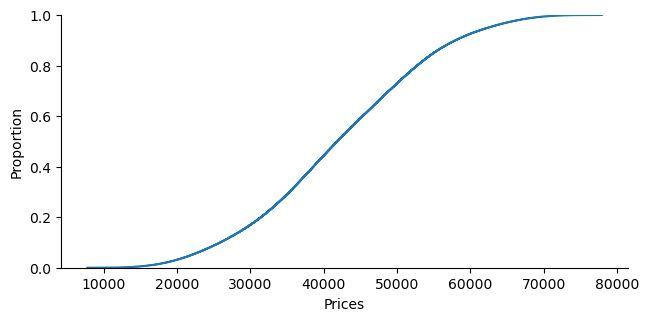

In [78]:
ax = sns.displot(data=df, x="Prices", kind="ecdf")
ax.figure.set_size_inches(7, 3)

So we can say that the Prices distribution follows the normal distribution 

c:\Users\khaba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


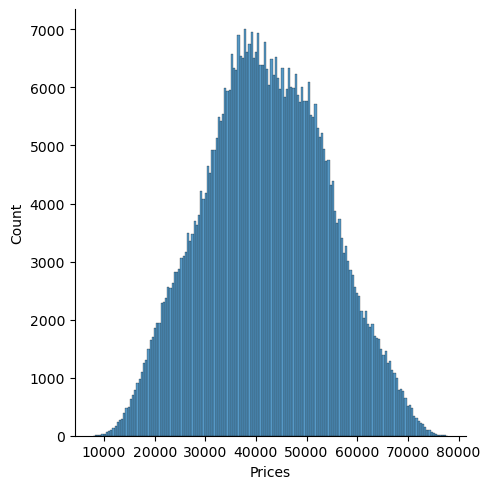

In [79]:
sns.displot(data=df, x="Prices")

Other way to see if the data follows th normal way 

<Axes: xlabel='Prices', ylabel='Count'>

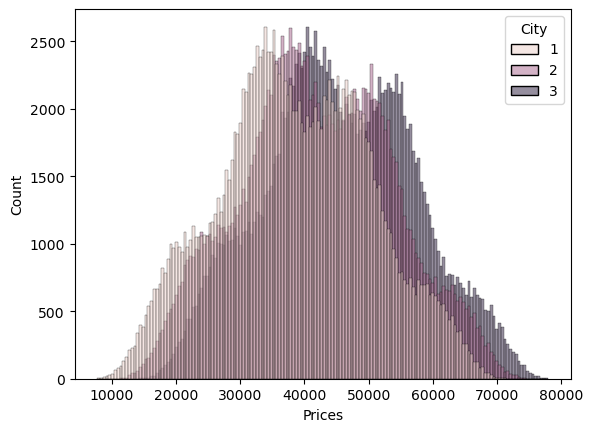

In [80]:
sns.histplot(data=df, x="Prices", hue="City")

We plot the prices feauture in function of the city (1, 2 or 3)

# DATA TRAINING 

In [81]:
df

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1,55900
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1,29250
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0,51350
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0,62725


In [82]:
df.isna().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [83]:
target = "Prices"
predictors = list(set(df.columns) - set([target]))
print("new_df.shape:",df.shape)
df[predictors].head()

new_df.shape: (500000, 16)


,Baths,Glass Doors,Indian Marble,Area,Garage,FirePlace,White Marble,Solar,Electric,Garden,Swiming Pool,Floors,Black Marble,Fiber,City
0,2,1,0,164,2,0,0,1,1,0,0,0,1,1,3
1,4,1,1,84,2,0,0,0,0,1,1,1,0,0,2
2,4,0,0,190,2,4,1,0,0,0,0,0,0,1,2
3,4,1,1,75,2,4,0,1,1,1,1,1,0,1,1
4,2,1,0,148,1,4,1,1,0,1,1,1,0,0,2


In [84]:
new_df = df.astype(np.float32)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [86]:
X_train,x_test, Y_train,y_test = train_test_split(new_df[predictors],new_df[target],test_size= 0.2)

In [87]:
X_train = torch.from_numpy(X_train.values)
x_test = torch.from_numpy(x_test.values)
Y_train = torch.from_numpy(Y_train.values).reshape(-1,1)
y_test = torch.from_numpy(y_test.values).reshape(-1,1)

In [88]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: torch.Size([400000, 15])
x_test.shape: torch.Size([100000, 15])
Y_train.shape: torch.Size([400000, 1])
y_test.shape: torch.Size([100000, 1])


In [89]:
from TF import evaluate_model, train_network

In [90]:
class LinearR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [91]:
num_epochs = 100
batch_size = 1
loss_function = nn.MSELoss()

In [92]:
weight_decay = 0.0
lambda_L1=0.00

In [93]:
model = LinearR(15, 1)

In [94]:
adam_optimizer = torch.optim.SGD(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [95]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,Y_train,lambda_L1=0.0)

Epoch: 0 - Loss:nan


KeyboardInterrupt: 